In [1]:
import matplotlib.pyplot as plt
import dask.array as da
import numpy as np

In [2]:
def vis(ims, titles=None, cmaps=None):
    fig, axs = plt.subplots(1,len(ims),figsize=(4*len(ims), 3))
    
    axs = axs if isinstance(axs, np.ndarray) else [axs]
    
    for i, (im, ax) in enumerate( zip(ims, axs) ):
        if titles is not None:
            ax.set_title(titles[i])
            
        if cmaps is not None:
            im_plot = ax.imshow(im, cmap=cmaps[i])
        else:
            im_plot = ax.imshow(im)
            
        if im.dtype != np.bool:
            fig.colorbar(im_plot, ax=ax)
        
    plt.show(fig)

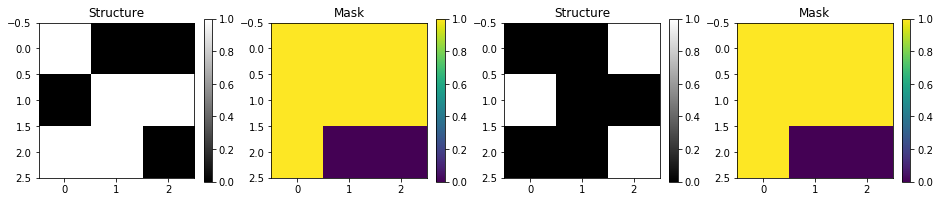

In [3]:
A = da.from_array(np.array([
    [
        [1, 0, 0],
        [0, 1, 1],
        [1, 1, 0]
    ],
    [
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1]
    ]
]))
mask = np.ones((2,3,3))
mask[:,2,1:] = 0
mask = da.from_array(mask)
show = lambda : vis(
    [A[0,...], mask[0,...], A[1,...], mask[1,...]],
    ['Structure', 'Mask'] *2,
    ['gray', 'viridis']*2
)
show()

In [4]:
from pymks.fmks import correlations

## Check that periodic still works

In [5]:
print( correlations.cross_correlation(A, A).compute() )
correct = (correlations.cross_correlation(A, A).compute() / 9).round(3).astype(np.float64)
tested = correlations.two_point_stats(A, A).compute().round(3).astype(np.float64)
print( correct )
print( tested )
print((correct == tested).all())

[[[2. 2. 4.]
  [2. 5. 2.]
  [4. 2. 2.]]

 [[1. 1. 1.]
  [0. 3. 0.]
  [1. 1. 1.]]]
[[[0.222 0.222 0.444]
  [0.222 0.556 0.222]
  [0.444 0.222 0.222]]

 [[0.111 0.111 0.111]
  [0.    0.333 0.   ]
  [0.111 0.111 0.111]]]
[[[0.222 0.222 0.444]
  [0.222 0.556 0.222]
  [0.444 0.222 0.222]]

 [[0.111 0.111 0.111]
  [0.    0.333 0.   ]
  [0.111 0.111 0.111]]]
True


## Test that non-periodic works

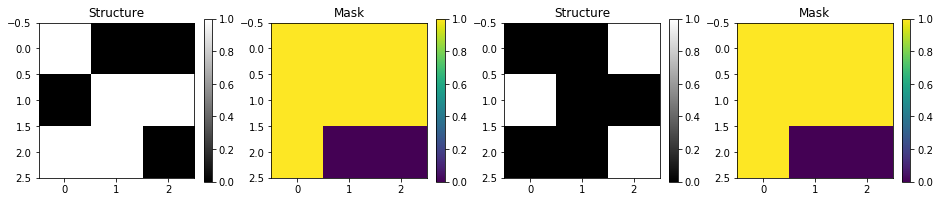

In [6]:
show()

In [7]:
correct_nonperiodic = np.array([
    [
        [1,1,2],
        [2,5,2],
        [2,1,1]
    ],
    [
        [0,0,0],
        [0,3,0],
        [0,0,0]
    ]
])

norm_nonperiodic = np.array([
    [4,6,4],
    [6,9,6],
    [4,6,4]
])

correct = (correct_nonperiodic / norm_nonperiodic).round(3).astype(np.float64)
tested = correlations.two_point_stats(A, A, periodic_boundary=False).compute().round(3).astype(np.float64)

print( correct )
print( tested )
print( correct == tested)
print( (correct == tested).all() )

[[[0.25  0.167 0.5  ]
  [0.333 0.556 0.333]
  [0.5   0.167 0.25 ]]

 [[0.    0.    0.   ]
  [0.    0.333 0.   ]
  [0.    0.    0.   ]]]
[[[ 0.25   0.167  0.5  ]
  [ 0.333  0.556  0.333]
  [ 0.5    0.167  0.25 ]]

 [[ 0.    -0.     0.   ]
  [-0.     0.333 -0.   ]
  [ 0.    -0.     0.   ]]]
[[[ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]]]
True


## Check that masking works

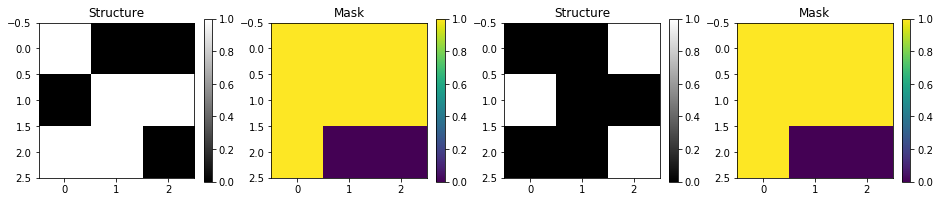

In [8]:
show()

In [9]:
correct_mask = np.array([
    [
        [1,0,1],
        [1,4,1],
        [1,0,1]
    ],
    [
        [0,0,0],
        [0,2,0],
        [0,0,0]
    ]
])

norm_mask = np.array([
    [2,4,3],
    [4,7,4],
    [3,4,2]
])

correct = (correct_mask / norm_mask).round(3).astype(np.float64)
tested = correlations.two_point_stats(A, A, mask=mask).compute().round(3).astype(np.float64)

print( correct )
print( tested )
print( correct == tested)
print( (correct == tested).all() )

[[[0.5   0.    0.333]
  [0.25  0.571 0.25 ]
  [0.333 0.    0.5  ]]

 [[0.    0.    0.   ]
  [0.    0.286 0.   ]
  [0.    0.    0.   ]]]
[[[0.5   0.    0.333]
  [0.25  0.571 0.25 ]
  [0.333 0.    0.5  ]]

 [[0.    0.    0.   ]
  [0.    0.286 0.   ]
  [0.    0.    0.   ]]]
[[[ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]]]
True
